# Regresión Básica: Predecir eficiencia de gasolina

En este notebook, utilizaremos un dataset de coches [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo de redes neuronales con el que  predecir el consumo de vehículos de 1970 y 1980. En este dataset dispondremos de atributos como Cilindros, desplazamiento, potencia y peso. El objetivo de este ejercicio es predecir las millas por galón de combustible (MPG).

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).


Empezaremos importando las librerías principales:

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.1


### Leyendo los datos

En primer lugar, lo que deberemos hacer es descargar el dataset:

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\TheBridge\\.keras\\datasets\\auto-mpg.data'

Y lo leemos con pandas:

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
dataset.isnull()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


### Limpiando los datos

Trata los missings y variables categóricas:

In [5]:
dataset = dataset.dropna()

In [6]:
pd.get_dummies(dataset)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


### Divide los datos en train y test

Ahora divide el dataset en train y test, donde este último sea del 80%.

Llama a los datasets ``train_dataset`` y ``test_dataset``:

In [7]:
from sklearn.model_selection import train_test_split
y_col = 'MPG'
X_cols = [col for col in dataset.columns if col != y_col]
X_cols

X = dataset[X_cols]
y = dataset[y_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)



In [8]:
X_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
79,4,96.0,69.0,2189.0,18.0,72,2
276,4,121.0,115.0,2795.0,15.7,78,2
248,4,91.0,60.0,1800.0,16.4,78,3
56,4,91.0,70.0,1955.0,20.5,71,1
393,4,140.0,86.0,2790.0,15.6,82,1
...,...,...,...,...,...,...,...
80,4,122.0,86.0,2395.0,16.0,72,1
312,4,86.0,65.0,2019.0,16.4,80,3
357,4,119.0,100.0,2615.0,14.8,81,3
250,8,318.0,140.0,3735.0,13.2,78,1


### Inspecciona los datos

Revisa rápidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos. Repasa los gráficos de seaborn para ver cuál nos puede ofrecer esta visión, donde la diagonal principal muestre el *kernel density estimate*:

In [17]:
# import seaborn as sns

# sns.set_style('whitegrid')
# sns.pairplot(dataset);

Muestra también los estadísticos principales del dataset:

### Separa las features del target

En este momento, tenemos juntos tanto las variables independientes como el target. Sepáralos para tener ``train_dataset`` y ``test_dataset`` con las variables independientes, y ``train_labels`` y ``test_labels`` como target:

### Estandariza los datos

Es una buena práctica estandarizar los datasets con variables de diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada. Estandariza los datos sobreescribiendo los datos ``train_dataset`` y ``test_dataset``:

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.87326597, -0.85486343, -0.28591285, ...,  0.34274942,
        -0.86872055,  1.76704713],
       [ 0.29392855,  0.03135952, -0.52235185, ...,  0.16747256,
        -1.69905578, -0.69067324],
       [-0.87326597, -0.74890199, -0.33845485, ..., -0.18308116,
         1.06872831,  1.76704713],
       ...,
       [-0.87326597, -0.44065053, -0.52235185, ...,  0.72835851,
         0.51517149, -0.69067324],
       [-0.87326597, -0.95119201, -1.04777185, ...,  1.81507503,
         1.34550671, -0.69067324],
       [ 1.46112306,  1.95793117,  1.18526314, ..., -0.53363487,
        -0.86872055, -0.69067324]])

# Modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelva un único valor continuo.

Por tanto, necesitamos construir un modelo con tres capas:
  * **Entrada**: con activación relu.
  * **Hidden layer**: con activación relu
  * **Salida**: será de regresión, por lo que se compondrá de una única neurona.
  
Pon las neuronas que consideres para las dos primeras capas, por ejemplo, 64. Después iteraremos con diferentes combinaciones.

Para el compile utiliza un ``loss='mse'``, un ``optimizer = `tf.keras.optimizers.RMSprop(0.001)` ``, y en ``metrics`` utiliza una lista con el `mae` y `mse`.

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape= X_train.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])


In [21]:
model.compile(loss='mse',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['mae','mse'])

### Inspecciona el modelo

Utiliza uno de los métodos que hemos visto para obtener una descripción simple del modelo:

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


### Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [23]:
history = model.fit(X_train,
                   y_train,
                   epochs=200,
                   validation_split =0.2)

Epoch 1/200
7/7 [==============================] - 1s 69ms/step - loss: 614.0755 - mae: 23.3870 - mse: 614.0755 - val_loss: 650.5386 - val_mae: 24.3832 - val_mse: 650.5386
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 540.5399 - mae: 21.9984 - mse: 540.5399 - val_loss: 601.4291 - val_mae: 23.4200 - val_mse: 601.4291
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 495.0499 - mae: 20.8953 - mse: 495.0499 - val_loss: 550.0751 - val_mae: 22.3726 - val_mse: 550.0751
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 444.4197 - mae: 19.8551 - mse: 444.4197 - val_loss: 495.5753 - val_mae: 21.2044 - val_mse: 495.5753
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 408.2754 - mae: 18.8680 - mse: 408.2754 - val_loss: 438.9476 - val_mae: 19.9104 - val_mse: 438.9476
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 344.8936 - mae: 17.3806 - mse: 344.8936 - val_loss: 380.0100 - val_m

In [ ]:
history.history

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history.history`, donde representes el error de train con el de validación:

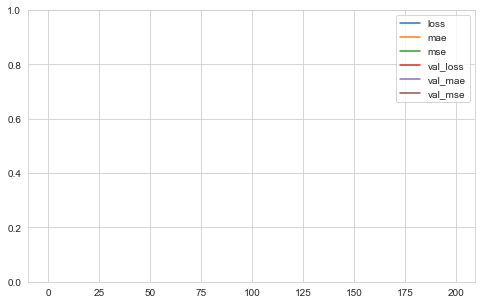

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

¿Alguna conclusión respecto a este gráfico?

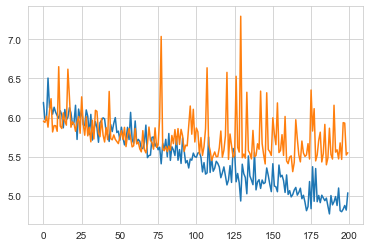

In [18]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])

Añade un early stopping al modelo. Ya hemos visto cómo hacerlo mediante el parámetro callback. En este caso, pon un patience de 10.


In [19]:
model_1 = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape= X_train.shape[1:]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model_1.compile(loss='mse',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['mae','mse'])

early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_1 = model_1.fit(X_train,
                   y_train,
                   epochs=1000,
                   validation_split =0.2,
                   callbacks=(early_stopping))

Epoch 1/1000
7/7 [==============================] - 1s 36ms/step - loss: 560.1117 - mae: 22.3913 - mse: 560.1117 - val_loss: 588.1499 - val_mae: 23.2155 - val_mse: 588.1499
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 459.2270 - mae: 20.2857 - mse: 459.2270 - val_loss: 519.2086 - val_mae: 21.7847 - val_mse: 519.2086
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 420.2208 - mae: 19.2759 - mse: 420.2208 - val_loss: 452.4884 - val_mae: 20.2816 - val_mse: 452.4884
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 353.2082 - mae: 17.6823 - mse: 353.2082 - val_loss: 382.2176 - val_mae: 18.5591 - val_mse: 382.2176
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 292.9497 - mae: 15.8193 - mse: 292.9497 - val_loss: 315.4436 - val_mae: 16.7195 - val_mse: 315.4436
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 245.8886 - mae: 14.3753 - mse: 245.8886 - val_loss: 251.9644 - val_

Añade un early stopping al modelo. Ya hemos visto cómo hacerlo mediante el parámetro ``callback``. En este caso, pon un ``patience`` de 10.

Evalúa el rendimiento del modelo mediante el estudio de los 3 valores que te devuelve el método que hemos visto para ello, que son: ``loss``, ``mae`` y ``mse``:

In [20]:
v_loss, v_mae, v_mse = model_1.evaluate(X_test, y_test)



4/4 [==============================] - 0s 1ms/step - loss: 6.8632 - mae: 1.9426 - mse: 6.8632


In [21]:
v_loss_1, v_mae_1, v_mse_1 = model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 6.8632 - mae: 1.9426 - mse: 6.8632


### Prediciendo

Ahora, probemos el modelo realizando una predicción de los primeros 10 valores y represéntalos en una gráfica frente a sus valores reales, es decir, uno en cada eje:

In [22]:
X_new = X_test[:10]
y_pred = model_1.predict(X_new)
y_pred

array([[25.43418 ],
       [20.53971 ],
       [35.62841 ],
       [27.07286 ],
       [29.367144],
       [29.498962],
       [13.356874],
       [30.338188],
       [17.61961 ],
       [31.25231 ]], dtype=float32)

In [ ]:
y_test[:10]

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
205    28.0
43     13.0
235    26.0
152    19.0
117    29.0
Name: MPG, dtype: float64

### EXTRA: Mejora el modelo

Aunque estemos ante muy pocas muestras, y el verdadero poder de las redes neuronales se observa con grandes volúmenes de datos, vamos a tratar de mejorar los resultados.

Modifica algunos de los parámetros utilizados en este modelo para intentar mejorar los resultados. Hay muchas posibilidades, pero empieza tocando un parámtro hasta encontrar un valor adecuado y luego modiica otros hasta obtener algo que sea suficientemente bueno.

También podrías crear nuevas variables para ver si mejora el modelo.